# Ingest and Plot OOI 1D Timeseries

In [1]:
import pandas as pd
import os
from datetime import datetime

import matplotlib.pyplot as plt

from ormhw.ooi import GoldCopy
from ormhw.transitions import CBR

## Wind Data

In [2]:
%%time
met4 = GoldCopy('CE04OSSM','SBD', 'METBK','metbk').data()
met2 = GoldCopy('CE02sHSM','SBD', 'METBK','metbk').data()

CPU times: user 2min 40s, sys: 14.2 s, total: 2min 55s
Wall time: 4min 36s


In [3]:
wind4 = met4[['tau','tau_x','tau_y','sirr']]
wind2 = met2[['tau','tau_x','tau_y','sirr']]

wind4 = wind4.resample('1D').mean()
wind2 = wind2.resample('1D').mean()

wind4 = wind4.rolling('8D').mean()
wind2 = wind2.rolling('8D').mean()

### Combining Wind Data

In [4]:
wind_combo = pd.concat([wind4, wind2])
wind_combo = wind_combo.dropna(subset = ['tau_y'])
wind_combo = wind_combo.reset_index()
wind_combo = wind_combo.drop_duplicates()
wind_combo.index = wind_combo.time
wind_combo = wind_combo.drop(columns = ['time'])
wind_combo = wind_combo.resample('1D').mean()

In [5]:
wind_combo.to_csv('/home/jovyan/oregon-shelf-mhw/data/wind_combo.csv')

In [6]:
years = range(2015, 2023)
for year in years:
    wdf = wind_combo[(wind_combo.index >= datetime(year,7,9)) & (wind_combo.index <= datetime(year,10,7,23,59,59))]
    udf = wdf[wdf.tau_y < 0]
    ddf = wdf[wdf.tau_y >= 0]
    print(year)
    print(f"Up: {udf.tau_y.mean()}")
    print(f"Down: {ddf.tau_y.mean()}")

2015
Up: nan
Down: 0.041311163409862794
2016
Up: -0.05161576334072896
Down: 0.053733710318738026
2017
Up: -0.03256666132911336
Down: 0.009663501477975326
2018
Up: -0.032299831372546085
Down: 0.022270560022126427
2019
Up: -0.020013770140886268
Down: 0.026284615344170977
2020
Up: -0.031865350384854225
Down: 0.05419223059692844
2021
Up: -0.03241387865183523
Down: 0.05054739221589544
2022
Up: -0.026277623097304737
Down: 0.007900748048309102


## CTD Data

In [7]:
%%time
ctd4 = met4[['SA','CT','rho','spiciness']]
ctd2 = met2[['SA','CT','rho','spiciness']]
ctd1 = GoldCopy('CE01ISSM', 'SBD','CTD','ctd').data()

ctd4 = ctd4.resample('1D').mean()
ctd4 = ctd4.rolling('8D').mean()

ctd2 = ctd2.resample('1D').mean()
ctd2 = ctd2.rolling('8D').mean()

ctd1 = ctd1.resample('1D').mean()
ctd1 = ctd1.rolling('8D').mean()

CPU times: user 16.8 s, sys: 716 ms, total: 17.5 s
Wall time: 38.1 s


In [8]:
ctd4.to_csv('/home/jovyan/oregon-shelf-mhw/data/ctd_ce04.csv')
ctd2.to_csv('/home/jovyan/oregon-shelf-mhw/data/ctd_ce02.csv')
ctd1.to_csv('/home/jovyan/oregon-shelf-mhw/data/ctd_ce01csv')

## Fluorometer Data

In [9]:
%%time
chl4 = GoldCopy('CE04OSSM', 'RID', 'FLORT','flort').data()
chl2 = GoldCopy('CE02SHSM', 'RID', 'FLORT','flort').data()
chl1 = GoldCopy('CE01ISSM', 'RID', 'FLORT','flort').data()

chl4 = chl4.resample('1D').mean()
chl4 = chl4.rolling('8D').mean()

chl2 = chl2.resample('1D').mean()
chl2 = chl2.rolling('8D').mean()

chl1 = chl1.resample('1D').mean()
chl1 = chl1.rolling('8D').mean()

CPU times: user 5min 19s, sys: 53.8 s, total: 6min 12s
Wall time: 8min 37s


In [10]:
chl4.to_csv('/home/jovyan/oregon-shelf-mhw/data/chl_ce04.csv')
chl2.to_csv('/home/jovyan/oregon-shelf-mhw/data/chl_ce02.csv')
chl1.to_csv('/home/jovyan/oregon-shelf-mhw/data/chl_ce01csv')

## Nitrate Data

In [11]:
%%time
nit4 = GoldCopy('CE04OSSM','RID','NUTNR','suna').data()
nit2 = GoldCopy('CE02SHSM','RID','NUTNR','suna').data()
nit1 = GoldCopy('CE01ISSM','RID','NUTNR','suna').data()

nit4 = nit4.resample('1D').mean()
nif4 = nit4.rolling('8D').mean()

nit2 = nit2.resample('1D').mean()
nit2 = nit2.rolling('8D').mean()

nit1 = nit1.resample('1D').mean()
nit1 = nit1.rolling('8D').mean()

CPU times: user 20min 55s, sys: 10min 30s, total: 31min 26s
Wall time: 32min 55s


In [12]:
nit4.to_csv('/home/jovyan/oregon-shelf-mhw/data/nit_ce04.csv')
nit2.to_csv('/home/jovyan/oregon-shelf-mhw/data/nit_ce02.csv')
nit1.to_csv('/home/jovyan/oregon-shelf-mhw/data/nit_ce01csv')

# LaTeX Output

In [13]:

print(r'Year & $\overline{\tau_{y}} (\frac{N}{m^2})$ & $\overline{CT} (^{\circ}C)$ & $\overline{SA} (ASU)$ & $\overline{\rho} (\frac{kg}{m^3})$ & $\overline{CHL_A} (\frac{ug}{L})$ & $\overline{NO_3} ({\mu}M)$ & $\overline{SIRR} (\frac{W}{m^2})$ \\\\ \hline')

for year in range(2015,2023):
    ctd_avg = ctd4[(ctd4.index >= datetime(year,7,9)) & (ctd4.index <= datetime(year,10,7))].mean()
    wind_avg = wind_combo[(wind_combo.index >= datetime(year,7,9)) & (wind_combo.index <= datetime(year,10,7))].mean()
    chl_avg = chl4[(chl4.index >= datetime(year,7,9)) & (chl4.index <= datetime(year,10,7))].mean()
    nit_avg = nit4[(nit4.index >= datetime(year,7,9)) & (nit4.index <= datetime(year,10,7))].mean()
    
    print(f"{year} & {round(wind_avg.tau_y,3)} & {round(ctd_avg.CT,2)} & {round(ctd_avg.SA,2)} & {round(ctd_avg.rho,2)} & {round(chl_avg.fchla,2)} & {round(nit_avg.nitrate,2)} & {round(wind_avg.sirr,2)} \\\\")

Year & $\overline{\tau_{y}} (\frac{N}{m^2})$ & $\overline{CT} (^{\circ}C)$ & $\overline{SA} (ASU)$ & $\overline{\rho} (\frac{kg}{m^3})$ & $\overline{CHL_A} (\frac{ug}{L})$ & $\overline{NO_3} ({\mu}M)$ & $\overline{SIRR} (\frac{W}{m^2})$ \\\\ \hline
2015 & 0.041 & 15.78 & 32.44 & 1023.73 & 1.64 & nan & 174.55 \\
2016 & 0.01 & 14.94 & 32.22 & 1023.74 & 4.12 & nan & 149.81 \\
2017 & -0.029 & 14.23 & 32.51 & 1024.11 & 2.48 & nan & 216.26 \\
2018 & -0.024 & 15.0 & 32.25 & 1023.75 & 2.15 & 5.09 & 195.36 \\
2019 & -0.009 & 17.24 & 32.0 & 1023.06 & 1.28 & 1.04 & 213.44 \\
2020 & -0.012 & 13.9 & 32.37 & 1024.07 & 3.31 & 7.7 & 206.59 \\
2021 & -0.02 & 13.99 & 32.25 & 1023.95 & 4.79 & 3.01 & 230.58 \\
2022 & -0.021 & 15.4 & 31.43 & 1023.04 & 2.03 & 3.15 & 205.59 \\


# Figure

In [14]:
figure_directory = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures"
os.makedirs(figure_directory, exist_ok = True)
figure_save_filepath = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures/ooi_1D_timeseries.png"

In [15]:
mhwdf = pd.read_csv('/home/jovyan/oregon-shelf-mhw/data/mhws/mhws_ce04.csv', index_col = 0)

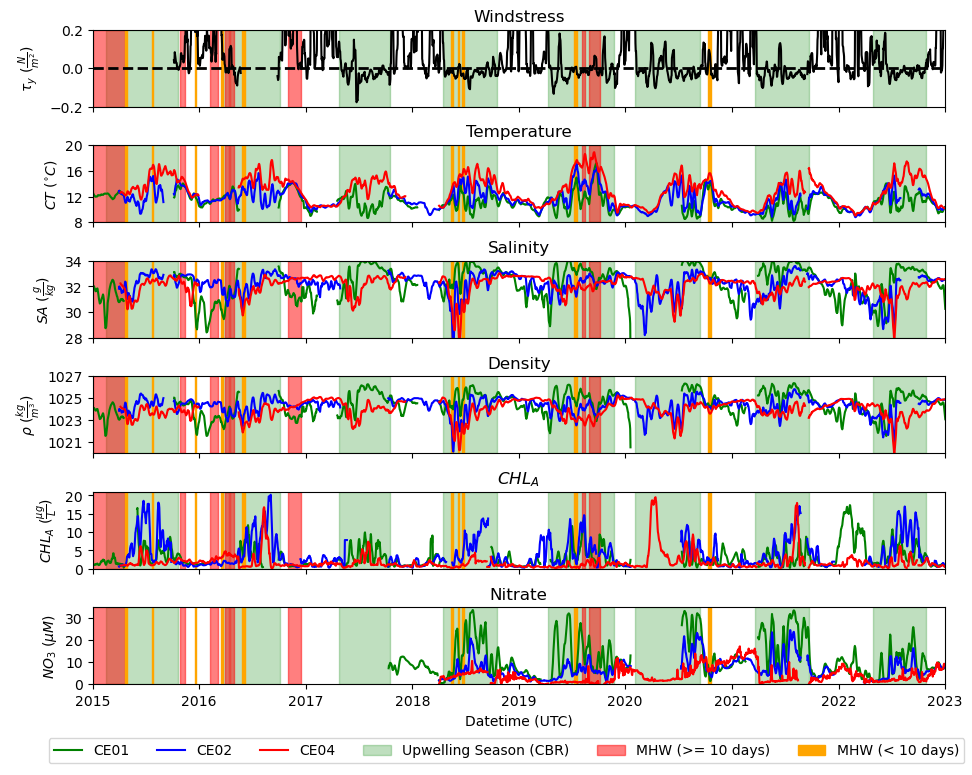

In [16]:
fig, ax = plt.subplots(6,1, figsize = (11,8.5), sharex = True)


ax[0].plot(wind_combo.index, wind_combo.tau_y, color = 'black')
ax[0].axhline(0, color = 'black',linestyle = '--', linewidth = 2)
ax[0].set_ylim(-0.1,0.1)
ax[0].set_ylabel(r'$\tau_y\ (\frac{N}{m^2})$')
ax[0].set_title('Windstress')
ax[0].yaxis.set_ticks([-0.2,0,0.2])

ax[1].plot(ctd1.index, ctd1.CT, color = 'green',label = 'CE01')
ax[1].plot(ctd2.index, ctd2.CT, color = 'blue', label = 'CE02')
ax[1].plot(ctd4.index, ctd4.CT, color = 'red', label = 'CE04')
ax[1].set_ylim(8,20)
ax[1].set_ylabel(r'$CT\ (^{\circ}C)$')
ax[1].set_title('Temperature')
ax[1].yaxis.set_ticks([8,12,16,20])

ax[2].plot(ctd1.index, ctd1.SA, color = 'green')
ax[2].plot(ctd2.index, ctd2.SA, color = 'blue')
ax[2].plot(ctd4.index, ctd4.SA, color = 'red')
ax[2].set_ylim(28,34)
ax[2].set_ylabel(r'$SA\ (\frac{g}{kg})$')
ax[2].set_title('Salinity')
ax[2].yaxis.set_ticks([28,30,32,34])

ax[3].plot(ctd1.index, ctd1.rho, color = 'green')
ax[3].plot(ctd2.index, ctd2.rho, color = 'blue')
ax[3].plot(ctd4.index, ctd4.rho, color = 'red')
ax[3].set_ylim(1020,1027)
ax[3].set_ylabel(r'$\rho\ (\frac{kg}{m^3})$')
ax[3].set_title('Density')
ax[3].yaxis.set_ticks([1021,1023,1025,1027])


ax[4].plot(chl1.index, chl1.fchla, color = 'green')
ax[4].plot(chl2.index, chl2.fchla, color = 'blue')
ax[4].plot(chl4.index, chl4.fchla, color = 'red')
ax[4].set_ylim(0,21)
ax[4].set_ylabel(r'$CHL_A\ (\frac{\mu{g}}{L})$')
ax[4].set_title(r'$CHL_A$')
ax[4].yaxis.set_ticks([0,5,10,15,20])


ax[5].plot(nit1.index, nit1.nitrate, color = 'green')
ax[5].plot(nit2.index, nit2.nitrate, color = 'blue')
ax[5].plot(nit4.index, nit4.nitrate, color = 'red')
ax[5].set_ylim(0,35)
ax[5].set_ylabel(r'$NO_3\ ({\mu}M)$')
ax[5].set_title('Nitrate')
ax[5].yaxis.set_ticks([0,10,20,30])


for i in range(6):
    for year in range(2015,2023):
        SF = CBR[year]
        ax[i].axvspan(datetime.strptime(f'{year}-{SF["spring"]}', '%Y-%j'),datetime.strptime(f'{year}-{SF["fall"]}', '%Y-%j'), color = 'green',zorder = 0,alpha = 0.25, label = 'Upwelling Season (CBR)')

        _mhwdf = mhwdf[mhwdf.year == year]
        if len(_mhwdf) == 0: pass
        for idx, row in _mhwdf.iterrows():
            jds = datetime.strptime(f'{year}-{int(row.Ts)}', '%Y-%j')
            jde = datetime.strptime(f'{year}-{int(row.Te)}', '%Y-%j')
            if row.D >= 10:
                ax[i].axvspan(jds,jde,color = 'red',zorder = 1,alpha = 0.5, label = 'MHW (>= 10 days)')
            else:
                ax[i].axvspan(jds,jde,color = 'orange',zorder = 1,alpha = 1, label = 'MHW (< 10 days)')

_handles, _labels = ax[1].get_legend_handles_labels()
_handles = _handles[:6]
_labels = _labels[:6] 

ax[-1].set_xlim(datetime(2015,1,1),datetime(2023,1,1))
ax[-1].set_xlabel('Datetime (UTC)')
fig.legend(_handles, _labels,ncol = 6, loc = (0.05,0.015))
plt.subplots_adjust(hspace = 0.5)

plt.savefig(figure_save_filepath,dpi = 1200)
